## Time Series Forecasting For Road Accidents in UK

<b><mark>AIM</mark></b> to predict the number of future road accidents in the UK. 

The data has used from the Department for Transport (GB) [1]. This data is providing detailed road safety information about the circumstances of personal injury road accidents in GB from 2014 to 2017. We are going to implement <b>Time Series Forecasting using ARIMA & Prophet</b> to find out the number of road accidents in the future.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Check our data
df = pd.read_csv("Road_Safety_Data_Accidents_2018.csv")

C:\Users\RodgersNyangweso\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [3]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2.01801e+12,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2.01801e+12,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2.01801e+12,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2.01801e+12,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2.01801e+12,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 32 columns):
Accident_Index                                 122635 non-null object
Location_Easting_OSGR                          122580 non-null float64
Location_Northing_OSGR                         122580 non-null float64
Longitude                                      122580 non-null float64
Latitude                                       122580 non-null float64
Police_Force                                   122635 non-null int64
Accident_Severity                              122635 non-null int64
Number_of_Vehicles                             122635 non-null int64
Number_of_Casualties                           122635 non-null int64
Date                                           122635 non-null object
Day_of_Week                                    122635 non-null int64
Time                                           122622 non-null object
Local_Authority_(District)                     122

In [5]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df_2 = df[['Date', 'Number_of_Casualties']]

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 2 columns):
Date                    122635 non-null datetime64[ns]
Number_of_Casualties    122635 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB


In [9]:
# Sorting the data by Date
df_2 = df_2.sort_values(by=['Date'])
df_2.head()

,Date,Number_of_Casualties
0,2018-01-01,2
52536,2018-01-01,4
52535,2018-01-01,1
52530,2018-01-01,1
49618,2018-01-01,1


In [10]:
# Set the Date for Index
accident = df_2.set_index('Date')
accident.index

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01',
               ...
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=122635, freq=None)

In [12]:
# Extract the average number of casualties in each month
y = accident['Number_of_Casualties'].resample('MS').mean()
y.head()

Date
2018-01-01    1.294352
2018-02-01    1.315906
2018-03-01    1.299608
2018-04-01    1.316928
2018-05-01    1.312321
Freq: MS, Name: Number_of_Casualties, dtype: float64

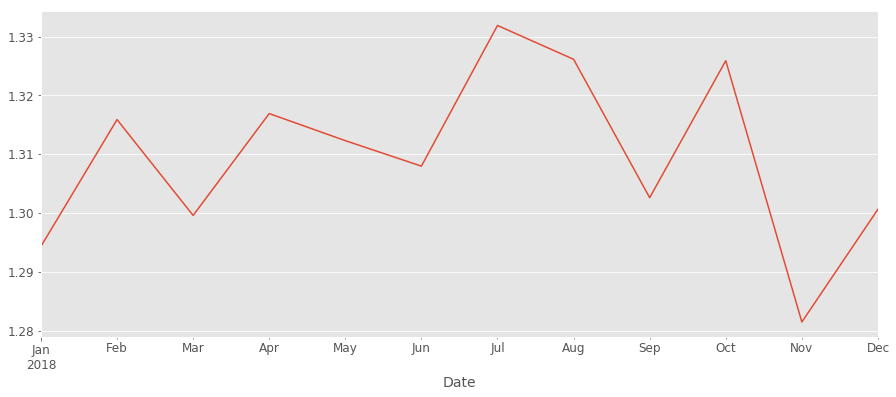

In [14]:
# Visualize the average number of casualties in each month
y.plot(figsize=(15, 6))